In [32]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
from tweepy import Stream                   
from tweepy.streaming import StreamListener
import json
import csv
import os
from os import path
import got3

In [33]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w+:\/\/\S+)", " ", tweet).split())

In [34]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w+:\/\/\S+)", " ", tweet).split())

In [35]:
def get_tweet_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [36]:
def write_to_csv(tweet):
    #fields = ["timestamp", "tweet", "user", "verified", "url"]
    fields = ["Date", "Positve", "Negative", "Neutral",]
    filename = "/home/julian/ml-cmpe257/AmazonSentiment.csv"
    fileState = path.isfile(filename)
    with open(filename,'a') as fd:        
        writer = csv.writer(fd)
        if(not fileState):
            writer.writerow(fields)
        else:
            print(tweet)
            writer.writerow([tweet.Date, tweet.Positive, tweet.Negative, tweet.Neutral])
 

In [37]:
import pandas as pd
 
tweets_data_path = "/home/julian/ml-cmpe257/AMZN_Twitter.csv"
pdData = pd.read_csv(tweets_data_path, delimiter=",")

all_tweets = []
count = 0
pdData['Date'] = pd.to_datetime(pdData['Date']).dt.date
#list(pdData.groupby('Date')['Tweet'])
pdata = pdData.groupby('Date')['Tweet']
print (pdata.head())


0         b'# iTunes # NewSong No. 3 uknowhatimsayin\xef...
1         b'# iTunes # NewSong No. 4 Deserted # Gatecree...
2         b'\xe3\x81\x95\xe3\x81\x99\xe3\x81\x8c\xe3\x82...
3         b'# iTunes # NewSong No. 5 All Mirrors # Angel...
4         b'# iTunes # NewSong No. 6 Long Money # Peewee...
                                ...                        
107349    b'https://amzn.to/2KuGMCr Licheers Handy & Tab...
107350    b'Dayummm\xe2\x80\xa6they gon add $ AMZN to th...
107351    b'https://amzn.to/2WST8Ws Deconovo Tischdecke ...
107352    b'https://amzn.to/2IU19pj IP-Kamera-Antennenzu...
107353    b'https://amzn.to/2Fk60Pu IceUnicorn Herren La...
Name: Tweet, Length: 550, dtype: object


In [42]:
for date, twt in pdata:
    #print (date)
    tweets_day = {}
    tweets_data = []
    tweets_day['Date'] = date
    count = 0
    for t in twt:
        parsedTweet = {}
        #parsedTweet['text'] = t
        parsedTweet['sentiment'] = get_tweet_sentiment(t)
        tweets_data.append(parsedTweet)
        count = count + 1
    #tweets_day['data'] = tweets_data
    #print (tweets_day)
    
    ptweets = [tweet for tweet in tweets_data if tweet['sentiment'] == 'positive']
    tweets_day['Positive'] = 100*len(ptweets)/len(tweets_data)
    ntweets = [tweet for tweet in tweets_data if tweet['sentiment'] == 'negative']
    tweets_day['Negative'] = 100*len(ntweets)/len(tweets_data)
    tweets_day['Neutral'] = 100*(len(tweets_data) - len(ntweets) - len(ptweets))/len(tweets_data)
    tweets_day['Count'] = count
    print (tweets_day)
    all_tweets.append(tweets_day)
#print(all_tweets)

{'Date': datetime.date(2019, 6, 19), 'Positive': 35.922330097087375, 'Negative': 8.980582524271844, 'Neutral': 55.09708737864078, 'Count': 412}
{'Date': datetime.date(2019, 6, 20), 'Positive': 37.04735376044568, 'Negative': 10.21355617455896, 'Neutral': 52.73909006499536, 'Count': 1077}
{'Date': datetime.date(2019, 6, 21), 'Positive': 35.54778554778555, 'Negative': 12.121212121212121, 'Neutral': 52.33100233100233, 'Count': 858}
{'Date': datetime.date(2019, 6, 22), 'Positive': 34.32282003710575, 'Negative': 9.090909090909092, 'Neutral': 56.58627087198516, 'Count': 539}
{'Date': datetime.date(2019, 6, 23), 'Positive': 30.673758865248228, 'Negative': 8.333333333333334, 'Neutral': 60.99290780141844, 'Count': 564}
{'Date': datetime.date(2019, 6, 24), 'Positive': 37.00707785642063, 'Negative': 10.920121334681497, 'Neutral': 52.072800808897874, 'Count': 989}
{'Date': datetime.date(2019, 6, 25), 'Positive': 39.42307692307692, 'Negative': 10.926573426573427, 'Neutral': 49.65034965034965, 'Count

{'Date': datetime.date(2019, 8, 16), 'Positive': 34.04255319148936, 'Negative': 9.966405375139978, 'Neutral': 55.99104143337066, 'Count': 893}
{'Date': datetime.date(2019, 8, 17), 'Positive': 37.344398340248965, 'Negative': 7.261410788381743, 'Neutral': 55.3941908713693, 'Count': 482}
{'Date': datetime.date(2019, 8, 18), 'Positive': 34.09785932721712, 'Negative': 7.339449541284404, 'Neutral': 58.56269113149847, 'Count': 654}
{'Date': datetime.date(2019, 8, 19), 'Positive': 34.30185633575464, 'Negative': 8.958837772397095, 'Neutral': 56.73930589184827, 'Count': 1239}
{'Date': datetime.date(2019, 8, 20), 'Positive': 32.638259292837716, 'Negative': 11.060743427017226, 'Neutral': 56.30099728014506, 'Count': 1103}
{'Date': datetime.date(2019, 8, 21), 'Positive': 35.52188552188552, 'Negative': 7.9966329966329965, 'Neutral': 56.48148148148148, 'Count': 1188}
{'Date': datetime.date(2019, 8, 22), 'Positive': 33.916666666666664, 'Negative': 9.333333333333334, 'Neutral': 56.75, 'Count': 1200}
{'D

In [43]:
  #fields = ["timestamp", "tweet", "user", "verified", "url"]
fields = ["Date", "Positve", "Negative", "Neutral", "Total"]
filename = "/home/julian/ml-cmpe257/venv/machine-learning-stock-market/TwitterData/AmazonSentiment.csv"
fileState = path.isfile(filename)
with open(filename,'a') as fd:        
    writer = csv.writer(fd)
    if(not fileState):
        writer.writerow(fields)
    for sent in all_tweets:
        #tweet = all_tweets[idx]
        #print(sent['Date'])
        writer.writerow([sent['Date'], sent['Positive'], sent['Negative'], sent['Neutral'], sent['Count']])

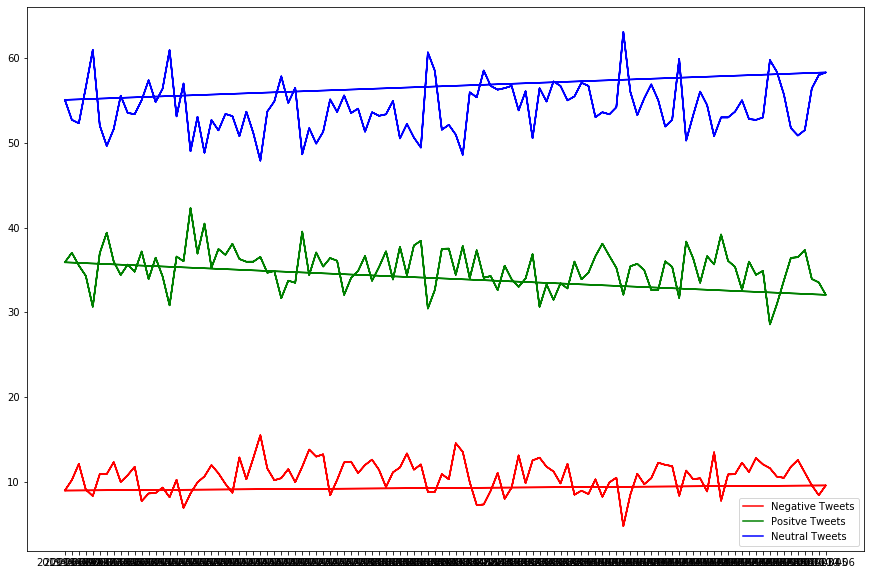

In [52]:
import matplotlib.pyplot as plt
tweets_analysis_path = "/home/julian/ml-cmpe257/venv/machine-learning-stock-market/TwitterData/AmazonSentiment.csv"
df = pd.read_csv(tweets_analysis_path, delimiter=",")
positive_analysis = df['Positve']
negative_analysis = df['Negative']

plt.figure(figsize=(15,10))
plt.plot(df['Date'], negative_analysis, color='r',label = 'Negative Tweets')
plt.plot(df['Date'], positive_analysis, color='g',label = 'Positve Tweets')
plt.plot(df['Date'],  df['Neutral'], color='b',label = 'Neutral Tweets')
plt.legend()
plt.show()